[2024-08-02 Fiddler](https://thefiddler.substack.com/p/can-you-hack-the-olympics)
====================
Let the skate order be A, B, C, D.

Skater D can only win by being in first place after she skates.

Let's just brute force it.

In [1]:
def leader(short, free):
    standings = [(short.index(p)/2 + free.index(p),free.index(p),p) for p in free]
    standings.sort()
    return standings[0][2]

def brute_force(n):
    count = 0
    for short in Permutations(n).list():
        for free in Permutations(n).list():
            winner = leader(short, free)
            notLeader = False
            for skater in [winner..n]:
                if winner != leader(short, [p for p in filter(lambda x: x <= skater,free)]):
                    notLeader = True
                    break
            if notLeader:
                count = count+1
    return count/factorial(n)^2
(brute_force(4),numerical_approx(brute_force(4)))

(1/24, 0.0416666666666667)

The probability is 1/24, about 4.167%.

Extra credit
------------
Brute force some values to see what it looks like.

In [2]:
for n in [1..5]:
    p = brute_force(n)
    print(n,p,numerical_approx(p))

1 0 0.000000000000000
2 0 0.000000000000000
3 0 0.000000000000000
4 1/24 0.0416666666666667
5 29/450 0.0644444444444444


Brute force becomes too slow for more than 5 skaters.  Let's look at the 24 cases with 4 skaters.

In [3]:
def examine(n):
    for short in Permutations(n):
        for free in Permutations(n):
            finalStandings = [(short.index(p)/2 + free.index(p),free.index(p),p) for p in free]
            finalStandings.sort()
            winner = finalStandings[0][2]
            redundant = False
            for skater in [winner..n]:
                currentFree = [p for p in filter(lambda x: x <= skater,free)]
                currentStandings = [(short.index(p)/2 + currentFree.index(p),currentFree.index(p),p) for p in currentFree]
                currentStandings.sort()
                if winner != currentStandings[0][2]:
                    print(winner,skater,redundant,short,free,finalStandings,currentStandings, \
                          n == 4 and len(currentStandings) == 3 and \
                          short[0] == free[2] and short[0] == currentStandings[0][2] and short[0] == finalStandings[2][2] and \
                          short[1] == 4 and free[1] == 4 and finalStandings[1][2] == 4 and \
                          short[2] == free[3] and short[2] == currentStandings[2][2] and short[2] == finalStandings[3][2] and \
                          short[3] == winner and free[0] == winner and currentStandings[1][2] == winner)
                    redundant = True
examine(4)

3 3 False [1, 2, 4, 3] [3, 4, 1, 2] [(3/2, 0, 3), (2, 1, 4), (2, 2, 1), (7/2, 3, 2)] [(1, 1, 1), (3/2, 0, 3), (5/2, 2, 2)] False
2 2 False [1, 3, 4, 2] [2, 3, 1, 4] [(3/2, 0, 2), (3/2, 1, 3), (2, 2, 1), (4, 3, 4)] [(1, 1, 1), (3/2, 0, 2)] False
2 2 False [1, 3, 4, 2] [2, 3, 4, 1] [(3/2, 0, 2), (3/2, 1, 3), (3, 2, 4), (3, 3, 1)] [(1, 1, 1), (3/2, 0, 2)] False
2 2 False [1, 3, 4, 2] [2, 4, 1, 3] [(3/2, 0, 2), (2, 1, 4), (2, 2, 1), (7/2, 3, 3)] [(1, 1, 1), (3/2, 0, 2)] False
2 3 True [1, 3, 4, 2] [2, 4, 1, 3] [(3/2, 0, 2), (2, 1, 4), (2, 2, 1), (7/2, 3, 3)] [(1, 1, 1), (3/2, 0, 2), (5/2, 2, 3)] False
2 2 False [1, 3, 4, 2] [2, 4, 3, 1] [(3/2, 0, 2), (2, 1, 4), (5/2, 2, 3), (3, 3, 1)] [(1, 1, 1), (3/2, 0, 2)] False
3 3 False [1, 4, 2, 3] [3, 4, 1, 2] [(3/2, 0, 3), (3/2, 1, 4), (2, 2, 1), (4, 3, 2)] [(1, 1, 1), (3/2, 0, 3), (3, 2, 2)] True
2 2 False [1, 4, 3, 2] [2, 3, 1, 4] [(3/2, 0, 2), (2, 1, 3), (2, 2, 1), (7/2, 3, 4)] [(1, 1, 1), (3/2, 0, 2)] False
2 2 False [1, 4, 3, 2] [2, 3, 4, 1] [

I don't have any insights from looking at this.  6 of them are consistent with the 2002 Olympics scenario:
since Slutskaya skates last, there are 3!=6 ways the other 3 skaters can be ordered.

Let skater $n$ be the skater that finished $n$th in the free skate.  Let $S_n$ be her finish in the short program,
and $T_n$ be her skate order.  There are $N!^2$ possibilities.

With $S_n$ alone, we can determine the winner.  And, with $N!$ possiblities in the skate order, we can determine
the probability that some skater was ahead of the winner in the overall standings at some point.

Consider skaters $i$ and $j > i$.  If $S_i \le S_j$, then skater $j$ will never be ahead of skater $i$.  There are
$j - i - 1$ skaters between them in the free skate rankings, and $r$ of them, where $0 \le r \le j - i - 1$ have
not skated yet when both skaters $i$ and $j$ have finished skating.  The score differential between the two
is initially $j - i - r + S_j/2 - S_i/2$, and, when all skaters have finished skating, ends up at $j - i + S_j/2 - S_i/2$.
If the differential is greater than or equal to zero, skater $i$ is ahead.  If the differential is less than zero,
skater $j$ is ahead.  So if $r > j - i + S_j/2 - S_i/2 \ge 0$, then skater $i$ would initially be behind skater $j$,
but ultimately end up ahead of skater $j$, otherwise, their relative overall standings will not change.

### Probability of winning

The probability that skater $n$ finishes behind skater 1 is the probability that $n + S_n/2 \ge 1 + S_1/2$,
or $S_1 \le S_n + 2n - 2$.  There are $\min(N-1,S_n+2n-3)$ skaters out of $N-1$ (excluding skater $n$), so
the probability that skater $n$ finishes ahead of skater 1 is
$1 - \min(N-1,S_n+2n-3)/(N-1) = (N-1-\min(N-1,S_n+2n-3))/(N-1)$.

The probability that skater $n$ finishes behind skater 2, given that skater $n$ finishes ahead of skater 1,
is the probability that $n + S_n/2 \ge 2 + S_2/2$, or $S_2 \le S_n + 2n - 4$.  There are
$\min(N-2,S_n+2n-5)$ skaters out of $N-2$ (excluding skaters 1 and $n$), so the probability that skater $n$
finishes ahead of skater 2 is
$1 - \min(N-2,S_n+2n-5)/(N-2) = (N-2-\min(N-2,S_n+2n-5))/(N-2)$.

Continuing in the same vein up to skater $n-1$, the probability that skater $n$ finishes behind skater $i$,
where $i < n$, given that skater $n$ finishes ahead of skaters 1 through $i-1$, is the probability  that
$n + S_n/2 \ge i + S_i/2$, or $S_i \le S_n + 2n - 2i$.  There are
$\min(N-i,S_n+2n-2i-1)$ skaters out of $N-i$,
so the probability that skater $n$ finishes ahead of skater $i$ is
$1 - \min(N-i,S_n+2n-2i-1)/(N-i) = (N-i-\min(N-i,S_n+2n-2i-1))/(N-i)$.

The probability that skater $n$ finishes behind skater $n+1$, given that skater $n$ finishes ahead of
skaters 1 through $n-1$, is the probability that $n + S_n/2 > n+1 + S_{n+1}/2$, or $S_{n+1} < S_n - 2$.
There are $S_n-3$ skaters out of $N-n$, so the probability that skater $n$ finishes ahead of skater $n+1$
is $1 - \min(0,S_n-3)/(N-n) = (N-n-\min(0,S_n-3))/(N-n)$.

The probability that skater $n$ finishes behind of skater $n+2$, given that skater $n$ finishes ahead of
skaters 1 through $n-1$ and $n+1$, is the probability that $n + S_n/2 > n+2 + S_{n+2}/2$, or
$S_{n+2} < S_n - 4$.  There are $\max(0,S_n-5)$ skaters out of $N-n-1$, so the probability that skater $n$
finishes ahead of skater $n+2$ is $1 - \max(0,S_n-5)/(N-n-1) = (N-n-1-\max(0,S_n-5))/(N-n-1)$.

Continuing in the same vein up to skater $N$, the probability that skater $n$ finishes behind skater $n+i$,
given that skater $n$ finishes ahead of skaters 1 through $n-1$ and $n+1$ through $n+i-1$, is the
probability that $n+S_n/2 > n+i+S_{n+i}/2$, or $S_{n+i} < S_n-2i$.  There are $\max(0,S_n-2i-1)$ skaters
out of $N-n-i+1$, so the probability that skater $n$ finishes ahead of skater $n+i$ is
$1 - \max(0,S_n-2i-1)/(N-n-i+1) = (N-n-i+1-\max(0,S_n-2i-1))/(N-n-i+1)$.

Putting it together, the probability that the winner finished $S_n$th in the short program and $n$th in the
free skate is

$$\begin{aligned}
    W(N,n,S_n) &= \frac{1}{N}
    \left(\prod_{i=1}^{n-1} \frac{N-i-\min(N-i,S_n+2n-2i-1)}{N-i}\right)
        \prod_{i=1}^{N-n} \frac{N-n-i+1-\max(0,S_n-2i-1)}{N-n-i+1} \\
    &= \frac{\left(\prod_{i=1}^{n-1} \left(N-i-\min(N-i,S_n+2n-2i-1)\right)\right)
                \prod_{i=1}^{N-n} \left(N-n-i+1-\max(0,S_n-2i-1)\right)}
            {N!} \\
\end{aligned}$$

In [4]:
%display latex
i, N, n, S_n = var('i N n S_n')
assume(N, "integer")
assume(n, "integer")
assume(S_n, "integer")
assume(N > 1)
assume(n >= 1)
assume(n <= N)
assume(S_n >= 1)
assume(S_n <= N)
W1(N,n,S_n) = product(N-i-min_symbolic(N-i,S_n+2*n-2*i-1),i,1,n-1)*product(N-n-i+1-max_symbolic(0,S_n-2*i-1),i,1,N-n)/factorial(N)
W1

(N, n, S_n) |--> -(-1)^(N + n)*(-1)^n*product(-N + i + n + max(0, S_n - 2*i - 1) - 1, i, 1, N - n)*product(-N + i + min(N - i, S_n - 2*i + 2*n - 1), i, 1, n - 1)/factorial(N)

Check this against a brute force calculation.

In [5]:
def W_brute_force(N,n,S_n):
    count = 0
    for S in Permutations(N).list():
        if S[n-1] != S_n:
            continue
        standings = [(i+S[i-1]/2,i) for i in [1..N]]
        standings.sort()
        if standings[0][1] == n:
            count = count+1
    return count/factorial(N)

In [6]:
[[list(filter(lambda x: x != 0, [W1(n,i,j).simplify() - W_brute_force(n,i,j) for i in [1..n]])) for j in [1..n]] for n in [1..6]]

[[[]],
 [[], []],
 [[], [], []],
 [[], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], [], []]]

Break up the products to avoid the $\max$ and $\min$ inside the products, allowing them to be expressed as factorials
to enable looking at approximations when $N$ is large.  Some wrangling is needed to avoid factorials of negative values.

In [7]:
# product(N-i-min_symbolic(N-i,S_n+2*n-2*i-1),i,1,n-1)
# N-i-S_n-2*n+2*i+1 = N-S_n-2*n+1+i, from N-S_n-2*n+2 to N-S_n-n
# if N-S_n-2*n+2 <= 0, product is zero => unit_step(N-S_n-2*n+1), except if n=1, product is one
W2(N,n,S_n) = unit_step(N-S_n-2*n+1+unit_step(1-n))*factorial(max_symbolic(0,N-S_n-n))/factorial(max_symbolic(0,N-S_n-2*n+1))*product(N-n-i+1-max_symbolic(0,S_n-2*i-1),i,1,N-n)/factorial(N)
W2

(N, n, S_n) |--> (-1)^(N + n)*factorial(max(0, N - S_n - n))*product(-N + i + n + max(0, S_n - 2*i - 1) - 1, i, 1, N - n)*unit_step(N - S_n - 2*n + unit_step(-n + 1) + 1)/(factorial(N)*factorial(max(0, N - S_n - 2*n + 1)))

In [8]:
[[list(filter(lambda x: x != 0, [W2(n,i,j).simplify() - W1(n,i,j) for i in [1..n]])) for j in [1..n]] for n in [1..6]]

[[[]],
 [[], []],
 [[], [], []],
 [[], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], [], []]]

In [9]:
# product(N-n-i+1-max_symbol(0,S_n-2*i-1),i,1,N-n)
# max is 0 when S_n-2*i-1 <= 0, 2*i >= S_n-1, i >= (S_n-1)/2
# product of N-n-i+1 for i from ceil((S_n-1)/2) to N-n
# product from 1 to N-n+1-ceil((S_n-1)/2)
# max is not 0 when i < (S_n-1)/2
# product of N-n-i+1-S_n+2*i+1 = N-n-S_n+2 + i for i from 1 to ceil((S_n-3)/2)
# product from N-n-S_n+3 to N-n-S_n+ceil((S_n-3)/2)
W(N,n,S_n) = unit_step(N-S_n-2*n+1+unit_step(1-n))*factorial(max_symbolic(0,N-S_n-n))/factorial(max_symbolic(0,N-S_n-2*n+1)) \
    *factorial(max_symbolic(0,N-n+1-ceil((S_n-1)/2)))*factorial(max_symbolic(0,N-n-S_n+2+ceil((S_n-3)/2)))/factorial(max_symbolic(0,N-n-S_n+2)) \
    /factorial(N)
W

(N, n, S_n) |--> factorial(max(0, N - S_n - n + ceil(1/2*S_n - 3/2) + 2))*factorial(max(0, N - S_n - n))*factorial(max(0, N - n - ceil(1/2*S_n - 1/2) + 1))*unit_step(N - S_n - 2*n + unit_step(-n + 1) + 1)/(factorial(N)*factorial(max(0, N - S_n - n + 2))*factorial(max(0, N - S_n - 2*n + 1)))

In [10]:
[[list(filter(lambda x: x != 0, [W(n,i,j).simplify() - W_brute_force(n,i,j) for i in [1..n]])) for j in [1..n]] for n in [1..6]]

[[[]],
 [[], []],
 [[], [], []],
 [[], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], [], []]]

Numerical exploration suggests that it's probably sufficient to consider $n$ from $1$ to $2\sqrt{N}$ and $S_n$
from $1$ to $N^{2/3}$.

In [11]:
[numerical_approx(sum([sum(W(N,n,S_n),S_n,1,floor(N^(2/3))) for n in [1..floor(2*sqrt(N))]])) for N in [50,100,200,300,400]]

[0.896868205459925,
 0.932399773233505,
 0.959337220785101,
 0.967440338960884,
 0.975599036813840]

For large $N$, if we only consider $n < 2\sqrt{N}$ and $S_n < N^{2/3}$, the factorials should never be negative.

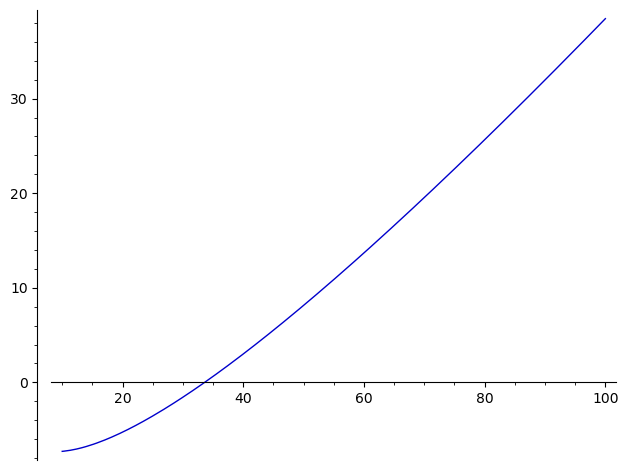

In [12]:
plot([x-4*sqrt(x)-x^(2/3)],x,10,100)

In [13]:
W_approx(N,n,S_n) = factorial(N-S_n-n) \
    /factorial(N-S_n-2*n+1) \
    *factorial(N-n+1-(S_n-1)/2) \
    *factorial(N-n-S_n+2+(S_n-3)/2) \
    /factorial(N-n-S_n+2) \
    /factorial(N)
W_approx

(N, n, S_n) |--> factorial(N - 1/2*S_n - n + 3/2)*factorial(N - 1/2*S_n - n + 1/2)*factorial(N - S_n - n)/(factorial(N - S_n - n + 2)*factorial(N - S_n - 2*n + 1)*factorial(N))

In [14]:
[numerical_approx(sum([sum(W_approx(N,n,S_n),S_n,1,floor(N^(2/3))) for n in [1..floor(2*sqrt(N))]])) for N in [50,100,200,400]]

[0.899149929386479, 0.933592420652810, 0.959953753700509, 0.975910201139807]

### Determining if relative standings change

Given that the winner is skater $n$, whose rank in the short program was $S_n$ and whose rank in the
free skate was $n$, what is the probability that she was not first in the overall rankings at some point
after finishing her free skate?

The winner could only be behind a skater that finished ahead of her in the short program and behind
her by more than one place in the free skate, with at least one of the skaters ranking between them
not having skated yet.

Let $C(N,n,S_n)$ the probability that was behind a skater in the overall standings some time after
finishing her free skate.  Then

$$ p_N = \sum_{n=1}^{N} \sum_{S_n=1}^{N} W(N,n,S_n)C(N,n,S_n) $$

The probability that skater $n+2$ was ahead in the overall rankings is the probability that $S_{n+2}/2 + 1 < S_n/2$
and that skater $n+1$ skates after both skater $n$ and $n+2$.  Since $S_{n+2}/2 + 2 \ge S_n/2$, that
means $S_n - 4 \le S_{n+2} < S_n - 2$, so $S_{n+2}$ could be either $S_n-4$ or $S_n-3$, so the first
probability is $2/(N-S_n+5)$.  Since $N$ is large, I'll wave my hands and
ignore the possibility that $S_n < 5$.

There are 3!=6 relative skate orderings for skaters $n$, $n+1$, and $n+2$, and 2 of them have skater $n+1$ skating last, so the
probability that skater $n+2$ was ahead is $C_2 = 2/(N-S_n+5) \cdot 1/3$.

The probability that skater $n+3$ was ahead in the overall rankings is the probability that
$S_{n+3}/2+1 < S_n/2$ and that enough of skaters $n+1$ and $n+2$ skate after both skater $n$ and $n+3$.
Since $S_{n+3}/2 + 3 \ge S_n/2$, that means $S_n - 6 \le S_{n+3} < S_n - 2$.  If $S_{n+3} = S_n-6$ or $S_{n+3} = S_n-5$,
both skaters $n+1$ and $n+2$ have to skate after both skaters $n$ and $n+3$.  If $S_{n+3} = S_n-4$ or $S_{n+3} = S_n-3$,
at least one of skaters $n+1$ and $n+2$ must skate after both skaters $n$ and $n+3$.  There are 4!=24 relative
skate orderings, and 4 of them have both $n+1$ and $n+2$ as the last 2, and $2\cdot3!=12$ have have at least one
of them last.  So the probability that skater $n+3$ was ahead is
$C_3 = 2/(N-S_n+7)\cdot 4/24 + 2/(N-S_n+7)\cdot 12/24$.

In general, the short program ranking skater $n+i$, $S_{n+i}$ could range from $S_n - 2i$ to $N$.  If $S_{n+i} = S_n - 2i$
or $S_{n+1} = S_n - 2i + 1$, then if at least one of the $i-1$ skaters from $n+1$ to $n+i-1$ skate after skaters $n$ and $n+i$,
skater $n+i$ would be temporarily ahead of skater $n$.  If $S_{n+i} = S_n - 2i + 2$ or $S_{n+i} = S_n - 2i + 3$, then
if at least two of those skaters skater after, the overall rankings would switch.  And so on.

The probability that $k$ skaters of $i-1$ skaters skate after both $n$ and $n+i$ is
$\frac{i-1}{i+1}\cdot\frac{i-2}{i} \cdots \frac{i-k}{i-k+2} = \frac{(i-1)!(i-k+1)!}{(i+1)!(i-k-1)!}$.

That means

$$ C_i = \sum_{k=1}^{i-1} \frac{2}{N-S_n+2i+1}\frac{(i-1)!(i-k+1)!}{(i+1)!(i-k-1)!}
  = \frac{2}{N-S_n+2i+1}\frac{(i-1)!}{(i+1)!} \sum_{k=1}^{i-1} \frac{(i-k+1)!}{(i-k-1)!}$$

In [15]:
k = var('k')
sum(factorial(i-k+1)/factorial(i-k-1),k,1,i-1).simplify_full()

1/3*i^3 - 1/3*i

So

$$ C_i = \frac{2}{N-S_n+2i+1}\frac{i(i^2-1)}{3i(i+1)} = \frac{2(i-1)}{3(N-S_n+2i+1)} $$

Getting $C$ is trickier.  If I use $C = C_2 + (1-C_2)(C_3 + (1-C_3)(C_4 + \ldots))$, that will ignore how
the two different cases of $C_2$ affect subsequent probabilities.  If skater $n+2$ has the rankings to be
ahead of skater $n$, but isn't due to skate order, that has one effect on the probabilities for $S_{n+3}$.
If skater $n+2$ has rankings that can't be ahead of skater $n$, that has another effect on the probabilities
for $S_{n+3}$.  I think my calculation of $C_i$ does not account for the second effect.

Adding in the opposite order has the same problem.

I'll just wave my hands and claim that $C = C_2 + C_3 + \ldots$ is a good enough approximation when $N$ is large.

$$ C(N,n,S_n) = \sum_{i=2}^{N-n} C_i $$

In [16]:
Ci(N,S_n,i) = 2*(i-1)/(3*(N-S_n+2*i+1))
Ci

(N, S_n, i) |--> 2/3*(i - 1)/(N - S_n + 2*i + 1)

In [17]:
C(N,n,S_n) = sum(Ci(N,S_n,i),i,2,N-n)
C

(N, n, S_n) |--> 1/6*S_n*(harmonic_number(3/2*N - 1/2*S_n - n + 1/2) - harmonic_number(1/2*N - 1/2*S_n + 3/2)) - 1/6*N*(harmonic_number(3/2*N - 1/2*S_n - n + 1/2) - harmonic_number(1/2*N - 1/2*S_n + 3/2) - 2) - 1/3*n - 1/2*harmonic_number(3/2*N - 1/2*S_n - n + 1/2) + 1/2*harmonic_number(1/2*N - 1/2*S_n + 3/2) - 1/3

In [18]:
p(N) = sum(sum(C(N,n,S_n)*W_approx(N,n,S_n),S_n,1,N/4),n,1,N/4)
p

N |--> 1/6*sum(sum(-((N - S_n + 3)*factorial(N - S_n - n)*harmonic_number(3/2*N - 1/2*S_n - n + 1/2) - ((N - S_n + 3)*harmonic_number(1/2*N - 1/2*S_n + 3/2) + 2*N - 2)*factorial(N - S_n - n) + 2*n*factorial(N - S_n - n))*factorial(N - 1/2*S_n - n + 3/2)*factorial(N - 1/2*S_n - n + 1/2)/(factorial(N - S_n - n + 2)*factorial(N - S_n - 2*n + 1)), S_n, 1, 1/4*N), n, 1, 1/4*N)/factorial(N)

In [19]:
p(N)

1/6*sum(sum(-((N - S_n + 3)*factorial(N - S_n - n)*harmonic_number(3/2*N - 1/2*S_n - n + 1/2) - ((N - S_n + 3)*harmonic_number(1/2*N - 1/2*S_n + 3/2) + 2*N - 2)*factorial(N - S_n - n) + 2*n*factorial(N - S_n - n))*factorial(N - 1/2*S_n - n + 3/2)*factorial(N - 1/2*S_n - n + 1/2)/(factorial(N - S_n - n + 2)*factorial(N - S_n - 2*n + 1)), S_n, 1, 1/4*N), n, 1, 1/4*N)/factorial(N)

### Fail
Well, that is an expression for some almost certainly wrong approximation of $p_N$, but I don't know
how to make sense of it or how to get a simplified approximation for when $N$ is large.

And it's certainly wrong

In [20]:
numerical_approx(p(50))

5.94161279452105

Monte Carlo calculation
=======================
Doing a [Monte Carlo calculation](20240802.go) gives yet another answer, which disagrees with the 4.2% and 6.4% results
for $N=4$ and $N=5$ in the brute-force calculations.  I don't know which is wrong.  They could both be wrong.

    $ go run 20240802.go
    N=3 0/500000 0.000000
    N=4 34788/500000 0.069576
    N=5 68708/500000 0.137416
    N=50 323154/500000 0.646308
    N=500 441788/500000 0.883576
    N=5000 480989/500000 0.961978

If this calculation is right, these results suggest that $p_N$ approaches 1 for large $N$.